<a href="https://colab.research.google.com/github/jfdoppler/DNL_1c2021/blob/main/04_integracion_2_rk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Integración II

## Nuestro caballito de batalla: [Runge Kutta](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods)

RK4 es el caballito de batalla de los integradores numéricos, pero, como todo, tiene sus ventajas y desventajas, y va a funcionar mejor o peor según el sistema.

Lo bueno de este método es que pueden escribirlo ustedes mismos y no hay nada de caja negra!
Para simplificar les vamos a dar una versión (que se adapta bastante bien si alternan con odeint (más adelante)).

Esta función ejecuta la integración de **un paso temporal**. Los argumentos que requiere son: i) campo vector (**función**) ii) valor de las variables en el tiempo t, iii) paso temporal

Los últimos dos (\*args, **kwargs) son para que, en caso de que sus campos vectores tengan argumentos, se los puedan pasar a la función y los sepa manejar (más, adelante)


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def rk4(dxdt, x, t, dt, *args, **kwargs):
    x = np.asarray(x)
    k1 = np.asarray(dxdt(x, t, *args, **kwargs))*dt
    k2 = np.asarray(dxdt(x + k1*0.5, t, *args, **kwargs))*dt
    k3 = np.asarray(dxdt(x + k2*0.5, t, *args, **kwargs))*dt
    k4 = np.asarray(dxdt(x + k3, t, *args, **kwargs))*dt
    return x + (k1 + 2*k2 + 2*k3 + k4)/6

Veamoslo con el ejemplo de Gompertz. Primero definimos el campo vector. Este tiene que ser una **función** que devuelva la derivada en el punto (o una lista con las derivadas de cada componente).


In [3]:
def dNdt(N, t):
    return -N*np.log(N)

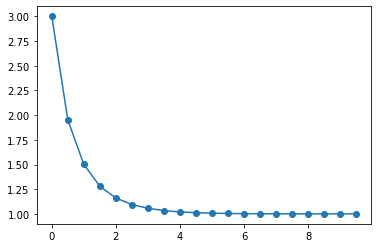

In [4]:
# Definimos el paso temporal y el vector de tiempos
dt = 0.5
t = np.arange(0, 10, step=dt)
# Damos la condición inicial
N0 = 3
# Nos creamos un vector para guardar la solución
Nrk = np.zeros_like(t)
Nrk[0] = N0
for ix, tt in enumerate(t[:-1]):
    # Avanzamos un paso temporal
    Nrk[ix+1] = rk4(dNdt, Nrk[ix], tt, dt)
plt.plot(t, Nrk, 'o-')


De nuevo, es una buena práctica chequear que al achicar el paso de integración no cambie el resultado

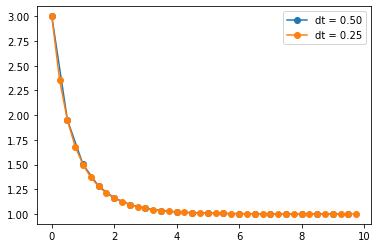

In [ ]:
# Definimos el paso temporal y el vector de tiempos
dt = 0.5
t = np.arange(0, 10, step=dt)
# Damos la condición inicial
N0 = 3
# Nos creamos un vector para guardar la solución
Nrk = np.zeros_like(t)
Nrk[0] = N0
for ix, tt in enumerate(t[:-1]):
    # Avanzamos un paso temporal
    Nrk[ix+1] = rk4(dNdt, Nrk[ix], tt, dt)
plt.plot(t, Nrk, 'o-', label='dt = {:.2f}'.format(dt))

dt2 = 0.25
t2 = np.arange(0, 10, step=dt2)
# Damos la condición inicial
N0 = 3
# Nos creamos un vector para guardar la solución
Nrk = np.zeros_like(t2)
Nrk[0] = N0
for ix, tt in enumerate(t2[:-1]):
    # Avanzamos un paso temporal
    Nrk[ix+1] = rk4(dNdt, Nrk[ix], tt, dt2)
plt.plot(t2, Nrk, 'o-', label='dt = {:.2f}'.format(dt2))

plt.legend()

### Con parámetros

In [ ]:
def rk4(dxdt, x, t, dt, *args, **kwargs):
    x = np.asarray(x)
    k1 = np.asarray(dxdt(x, t, *args, **kwargs))*dt
    k2 = np.asarray(dxdt(x + k1*0.5, t, *args, **kwargs))*dt
    k3 = np.asarray(dxdt(x + k2*0.5, t, *args, **kwargs))*dt
    k4 = np.asarray(dxdt(x + k3, t, *args, **kwargs))*dt
    return x + (k1 + 2*k2 + 2*k3 + k4)/6

In [6]:
def dNdt_ab(N, t, a, b):
    return -a*N*np.log(b*N)

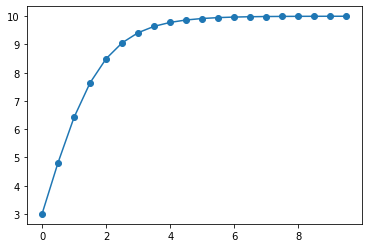

In [7]:
a = 1
b = 0.1
dt = 0.5
t = np.arange(0, 10, step=dt)
# Damos la condición inicial
N0 = 3
# Nos creamos un vector para guardar la solución
Nrk = np.zeros_like(t)
Nrk[0] = N0
for ix, tt in enumerate(t[:-1]):
    # Avanzamos un paso temporal
    Nrk[ix+1] = rk4(dNdt_ab, Nrk[ix], tt, dt, a, b)
plt.plot(t, Nrk, 'o-', label='dt = {:.2f}'.format(dt))

## Ejercicios:

1) Calculá y graficá N(t) para distintas condiciones iniciales

2) Integrá el ejercicio del switch bioquímico para algunas condiciones iniciales y parámetros que te interesen.

3) Ahora resolvé numéricamente el punto (c) del ejercicio y mostrá la evolución de g al prender y apagar la señal S.

## 2D

El integrador nuevamente requiere que le pasemos el punto donde estamos como una lista y nos devuelve el x e y siguientes. Una forma de atajar bien los valores es:


```
x[i+1], y[i+1] = rk4(campo_vector, [x[i], y[i]], tt, dt)

```



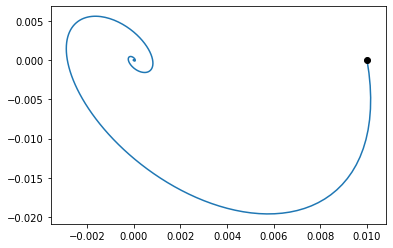

In [14]:
def campo_vector(z, t, a):
    # Como ahora las variables vienen en una lista (en el primer argumento: z)
    # primero las separamos para que sea más claro
    x = z[0]
    y = z[1]
    # Y ahora calculamos las derivadas
    dxdt = a*x+2*y
    dydt = -17*x-5*y
    return [dxdt, dydt]

dt = 0.01
t = np.arange(0, 10, step=dt)
xrk = np.zeros_like(t)
yrk = np.zeros_like(t)
xrk[0] = 0.01
yrk[0] = 0
a = 1
for ix, tt in enumerate(t[:-1]):
    xrk[ix+1], yrk[ix+1] = rk4(campo_vector, [xrk[ix], yrk[ix]], tt, dt, a)
plt.plot(xrk, yrk)
plt.plot(xrk[0], yrk[0], 'ko')

## Para visualizar el flujo rápido!
Una función muy útil para tener una buena idea de como es el flujo es [*streamplot*](https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/plot_streamplot.html). Lo que hace es integrar durante un tiempo corto en una grilla de puntos.

Para hacerlo andar, necesitamos calcular cuanto vale el campo vector en cada punto de la grilla. Primero nos definimos una grilla usando la función [*meshgrid*](https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html).

In [15]:
# Definimos una grilla de puntos
XX, YY = np.meshgrid(np.arange(-2, 2, .01), np.arange(-4, 4, .01))

Ahora podemos usar el campo vector para calcular las derivadas en cada uno de estos puntos. La sintaxis para hacer esto (y que los argumentos sean potables para el streamplot) es la siguiente:

In [17]:
# Calculamos el campo vector en cada punto
DX, DY = campo_vector([XX, YY], 0, 1)

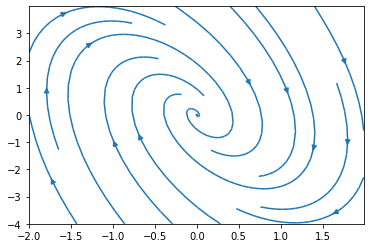

In [20]:
plt.streamplot(XX, YY, DX, DY, density=.51, minlength=.5)

## Integrar para atrás

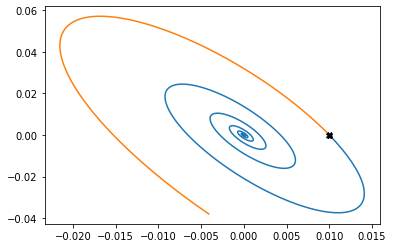

In [21]:
def campo_vector(z, t):
    x = z[0]
    y = z[1]
    dxdt = 4*x+2*y
    dydt = -17*x-5*y
    return [dxdt, dydt]

dt = 0.01
t = np.arange(0, 10, step=dt)
xrk = np.zeros_like(t)
yrk = np.zeros_like(t)
xrk[0] = 0.01
yrk[0] = 0

for ix, tt in enumerate(t[:-1]):
    xrk[ix+1], yrk[ix+1] = rk4(campo_vector, [xrk[ix], yrk[ix]], tt, dt)
plt.plot(xrk, yrk)

tpas = np.arange(0, -1, step=-dt)
xrkpas = np.zeros_like(tpas)
yrkpas = np.zeros_like(tpas)
xrkpas[0] = 0.01
yrkpas[0] = 0

for ix, tt in enumerate(tpas[:-1]):
    xrkpas[ix+1], yrkpas[ix+1] = rk4(campo_vector, [xrkpas[ix], yrkpas[ix]], tt, -dt)
plt.plot(xrkpas, yrkpas)

plt.plot(xrk[0], yrk[0], 'kX')

# Ejercicios

1) Para el sistema del ejercio 5c, graficá autovectores (indicando si son de autovalor positivo o negativo) y trayectorias que te permitan esquematizar el flujo del sistema

2) Analizá el sistema RLC (ejercicio 6) para los casos del punto c

3) Integra el oscilador de Van der Pol:

$$
\dot{x} = y − x^3 + x\\
\dot{y} = −0.1x
$$

para distintas condiciones iniciales. Graficá las nulclinas.

In [23]:
def dxdt(z, t):
    x = z[0]
    y = z[1]
    return [y-x**3+x, -0.1*x]

Dos formas de calcular nulclina:
- cuando podemos despejar

(-5.0, 5.0)

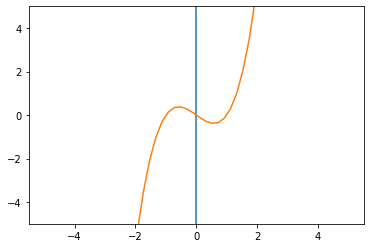

In [26]:
nuly_y = np.linspace(-5, 5)
nuly_x = np.zeros_like(nuly_y)
plt.plot(nuly_x, nuly_y)

nulx_x = np.linspace(-5, 5)
nulx_y = nulx_x**3-nulx_x
plt.plot(nulx_x, nulx_y)
plt.ylim(-5, 5)

- más en general

In [32]:
x = np.linspace(-2, 2, 100)
y = np.linspace(-5, 5, 100)
XX, YY = np.meshgrid(x, y)
DX, DY = dxdt([XX, YY], 0)

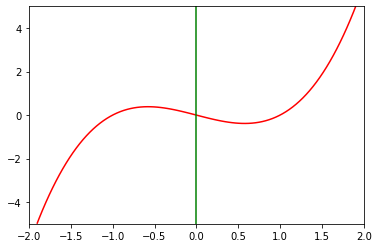

In [33]:
c = plt.contour(XX, YY, DX, levels=[0], colors=['r'])
c = plt.contour(XX, YY, DY, levels=[0], colors=['g'])


## Odeint

Hay diversos métodos, más o menos precisos y que funcionan para diversos sistemas. Scipy trae un integrador bastante bueno llamado "[odeint](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html)" (no teman a la documentación).

El odeint necesita que le digamos como calcular la derivada en cada punto (tenemos que darle la **función** campo vector como primer argumento), las condiciones iniciales (segundo argumento) y los tiempos donde queremos que nos de el resultado.

Rehagamos el ejercicio de Gompertz:

In [ ]:
from scipy.integrate import odeint

El integrador necesita que definamos el campo vector de cierta forma para que pueda interpretarlo correctamente. En particular, el **primer** argumento que reciba tiene que ser la variable (o una lista con las variables). El **segundo** argumento tiene que ser el tiempo (aunque no aparezca explícitamente en las ecuaciones). Luego pueden ponerse argumentos adicionales (si los hay).


In [ ]:
def dNdt(N, t):
    return -N*np.log(N)

El odeint se llama de la siguiente forma:


```
odeint(campo vector, condiciones iniciales, vector de tiempos)
```
Donde el primer argumento es el campo vector (definido de la forma que lo hicimos arriba), el segundo es la condición inicial (o una lista con las condiciones iniciales de cada variable) y el tercero es una lista de tiempos donde queremos que nos de el resultado de la integración.


In [ ]:
dt = 0.1
t = np.arange(0, 10, step=dt)
N0 = 3
sol = odeint(dNdt, N0, t)

Veamos qué es lo que nos devuelve:

In [ ]:
print(sol)

[[3.        ]
 [2.702198  ]
 [2.45829418]
 [2.25662882]
 [2.08844936]
 [1.94710187]
 [1.82746766]
 [1.72556532]
 [1.63826592]
 [1.56308654]
 [1.49803892]
 [1.44151732]
 [1.39221452]
 [1.34905827]
 [1.3111629 ]
 [1.27779193]
 [1.24832917]
 [1.22225604]
 [1.19913371]
 [1.17858895]
 [1.16030279]
 [1.14400142]
 [1.12944878]
 [1.1164406 ]
 [1.10479948]
 [1.0943708 ]
 [1.08501939]
 [1.07662677]
 [1.06908878]
 [1.06231361]
 [1.0562202 ]
 [1.05073677]
 [1.0457997 ]
 [1.04135245]
 [1.03734471]
 [1.03373165]
 [1.03047327]
 [1.02753381]
 [1.02488131]
 [1.02248713]
 [1.0203256 ]
 [1.01837371]
 [1.01661078]
 [1.01501825]
 [1.01357942]
 [1.01227926]
 [1.01110427]
 [1.01004228]
 [1.0090823 ]
 [1.00821447]
 [1.00742986]
 [1.00672045]
 [1.00607897]
 [1.00549889]
 [1.00497431]
 [1.00449987]
 [1.00407078]
 [1.00368268]
 [1.00333165]
 [1.00301412]
 [1.0027269 ]
 [1.00246708]
 [1.00223204]
 [1.00201942]
 [1.00182707]
 [1.00165306]
 [1.00149563]
 [1.00135321]
 [1.00122435]
 [1.00110778]
 [1.0010023 ]
 [1.00

Si queremos convertilo en la lista "bonita" podemos hacer lo siguiente (esta forma de escribirlo nos va a servir cuando lo hagamos en 2D!)

[3.         2.702198   2.45829418 2.25662882 2.08844936 1.94710187
 1.82746766 1.72556532 1.63826592 1.56308654 1.49803892 1.44151732
 1.39221452 1.34905827 1.3111629  1.27779193 1.24832917 1.22225604
 1.19913371 1.17858895 1.16030279 1.14400142 1.12944878 1.1164406
 1.10479948 1.0943708  1.08501939 1.07662677 1.06908878 1.06231361
 1.0562202  1.05073677 1.0457997  1.04135245 1.03734471 1.03373165
 1.03047327 1.02753381 1.02488131 1.02248713 1.0203256  1.01837371
 1.01661078 1.01501825 1.01357942 1.01227926 1.01110427 1.01004228
 1.0090823  1.00821447 1.00742986 1.00672045 1.00607897 1.00549889
 1.00497431 1.00449987 1.00407078 1.00368268 1.00333165 1.00301412
 1.0027269  1.00246708 1.00223204 1.00201942 1.00182707 1.00165306
 1.00149563 1.00135321 1.00122435 1.00110778 1.0010023  1.00090688
 1.00082054 1.00074243 1.00067175 1.00060781 1.00054995 1.0004976
 1.00045024 1.00040738 1.00036861 1.00033353 1.00030178 1.00027306
 1.00024707 1.00022356 1.00020228 1.00018303 1.00016561 1.000149

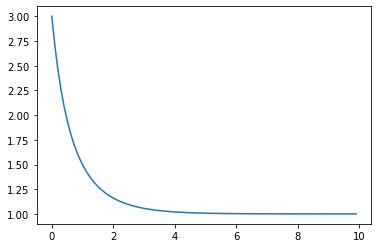

In [ ]:
N = sol[:, 0]
print(N)
plt.plot(t, N)

## Ejercicios

1) Investigá el efecto de cambiar el paso temporal en odeint

2) Compará el resultado de odeint con el de rk4 en algún ejercicio de la guía

### Ecuaciones con parámetros, como pasarle argumentos al odeint

Una de las cosas que nos suele interesar es analizar como cambian los flujos cuando cambiamos algún parámetro. Para eso está bueno tener una función definida y pasarle el parámetro que queremos ir moviendo como un argumento. Esto se puede hacer con el odeint, **agregando un argumento** (una *tupla*) cuando lo llamamos:

```
x = odeint(campo_vector, xi, t, args=(par1, par2))
```

Para que esto funcione, nuestro campo vector tiene que saber como tomar esos parámetros! Por eso tenemos que definirlo con:
```
def campo_vector(x, t, par1, par2)
    ...
```

Veamos el ejemplo del switch bioquímico, donde el campo vector se definía como:

$$
\dot{x} = s-rx+\dfrac{x^2}{1+x^2}
$$

con (r, s) dos parámetros que vamos a ir variando.

Text(0, 0.5, 'x')

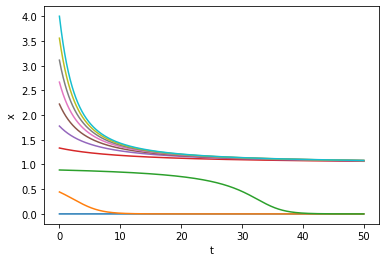

In [ ]:
# Definimos el campo vector, con los dos parámetros r y s
def campo_vector(x, t, r, s):
    dxdt = s - r*x + x**2/(1+x**2)
    return dxdt

# Definimos tiempo máximo, paso y un vector de tiempos
tmax = 50.
dt = 1./100
t = np.arange(0, tmax, dt)

# Le damos algún valor a los dos parámetros
r = 0.5
s = 0

# Nos preparamos varias condiciones iniciales
Xi = np.linspace(0, 4, 10)
for xi in Xi:
    # Para cada una de las condiciones iniciales hacemos la integración
    x = odeint(campo_vector, xi, t, args=(r, s))
    # Ploteamos. Python automáticamente va a ir cambiando el color en cada vuelta
    plt.plot(t, x)
plt.xlabel('t')
plt.ylabel('x')

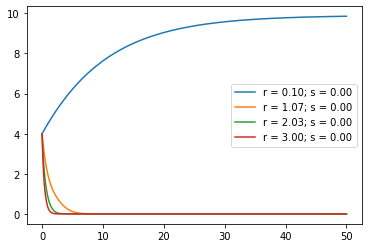

In [ ]:
# Ahora para un valor fijo de condición inicial, vemos qué pasa si cambiamos el 
# valor de uno de los parámetros

# Nos armamos una lista de valores para r
rs = np.linspace(0.1, 3, 4)
# Ponemos un única condición inicial
xi = 4
for r in rs:
    # Para cada valor del parámetro hacemos la integración
    x = odeint(campo_vector, xi, t, args=(r, s))
    # Graficamos y le ponemos una etiqueta a cada curva para reconocerlas
    plt.plot(t, x, label=r'r = {:.2f}; s = {:.2f}'.format(r, s))
# Le pedimos que nos muestre las etiquetas que generamos
plt.legend()

## Caso 2D

En 2 (o más) dimensiones funciona muy parecido. Solo nos tenemos que ocupar de escribir correctamente el campo vector para que el primer argumento sea un *array* que va a contener en cada elemento una variable distinta, desempaquetarlo y devolver un array de derivadas.

```
def campo_vector(variables, t):
    var1 = variables[0]
    var2 = variables[1]
    ...
    dvar1 = ...
    dvar2 = ...
    ...
    return [dvar1, dvar2, ...]
```

Veamoslo con el siguiente problema:

$$
\dot{x} = 4x+2y\\
\dot{y} = -17x-5y
$$


In [ ]:
def campo_vector(z, t):
    # Como ahora las variables vienen en una lista (en el primer argumento: z)
    # primero las separamos para que sea más claro
    x = z[0]
    y = z[1]
    # Y ahora calculamos las derivadas
    dxdt = 4*x+2*y
    dydt = -17*x-5*y
    return [dxdt, dydt]

[[ 1.00000000e-02  0.00000000e+00]
 [ 1.00399099e-02 -1.69914326e-04]
 [ 1.00796394e-02 -3.39656489e-04]
 ...
 [ 6.35455004e-06  1.82042740e-04]
 [ 6.74380586e-06  1.81023764e-04]
 [ 7.13257799e-06  1.80003275e-04]]


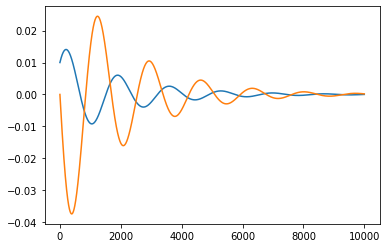

In [ ]:
dt = 0.001
t = np.arange(0, 10, dt)
# Ponemos condiciones iniciales
xi = 0.01
yi = 0
# Y nos armamos una lista que contiene ci de cada variable
zi = [xi, yi]
# Llamamos al odeint y vean que le pasamos la lista de condiciones iniciales!
sol = odeint(campo_vector, zi, t)
# Vean como nos viene la solución:
plt.plot(sol)
print(sol)

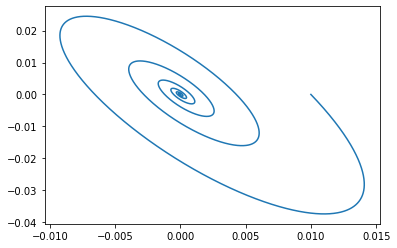

In [ ]:
# Cada elemento que nos devuelve es un par de coordenadas [x, y]
# Para recuperar las x por un lado y las y por el otro:
xt = sol[:, 0]
yt = sol[:, 1]
plt.plot(xt, yt)

### (Extra) Cómo pasarle al odeint un argumento que varía en el tiempo
A veces las ecuaciones diferenciales tienen parámetros que varían en el tiempo. Por ejemplo, en el ejercicio del switch vimos qué pasaba cuando aumentabamos el s y luego lo disminuiamos para distintos valores de r.

Una forma de hacer esto con el odeint es la siguiente:

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy import signal


Como siempre, definimos el campo vector. La particularidad del caso es que dentro del campo vector vamos a tener una función (que vamos a tener que definir más adelante) que va depender del tiempo. Esta función la va a ir llamando el odeint cuando la necesite.

En el ejemplo que sigue es la que llamamos *sfunc*

In [ ]:
def f(x, t, r):
    dxdt = sfunc(t) - r*x + x**2/(1+x**2)
    return dxdt


Una forma de definir una función es haciendo una *interpolación* de puntos, usando la función [*interp1d*](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html) de scipy.interpolate.

Para usar este método, tenemos que dar una serie de puntos (eje temporal) y los valores de la función en esos puntos. Arranquemos definiendo el vector de tiempos:

In [ ]:
tmax = 1000.
dt = 1./100
t = np.arange(0, tmax, dt)

Ahora tenemos que darle valores a la función en esos puntos. Hagamos como ejemplo que la función es medio período de una senoidal (sube y baja) y después se queda en cero. Para simplificar, arranquemos con una oscilación completa, es decir que un período sea exactamente *tmax*

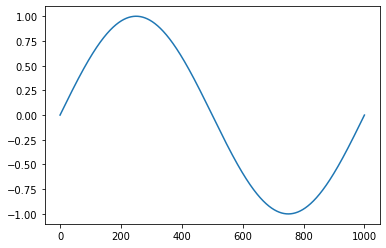

In [ ]:
periodo = tmax
st = np.sin(2*np.pi*t/periodo)
plt.plot(t, st)

Y ahora reemplacemos los valores negativos con ceros

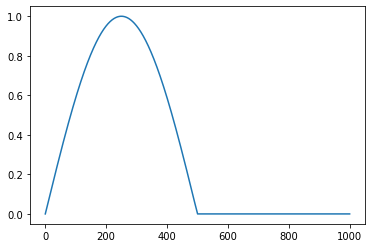

In [ ]:
st[st < 0] = 0
plt.plot(t, st)

Para hacer la interpolación hacemos


```
funcion_interp = interp1d(xvalues, yvalues, fill_value='extrapolate')
```

El primer argumento son los valores de x (para nosotros los tiempos) donde tenemos los valores de la función, y el segundo cuanto vale la función en esos puntos.

El último argumento le dice que si le preguntamos el valor de la función en algún lugar **por fuera** del rango donde le dimos datos, lo que va a hacer es extrapolar.

Lo que nos devuelve esto es una **función**, que podemos evaluar en valores de x.


In [ ]:
# Definimos una función que interpola linealmente a s
sfunc = interp1d(t, st, fill_value='extrapolate')
print(sfunc(1))
print(sfunc(-500))

0.006283143965558951
-3.1415926515227084


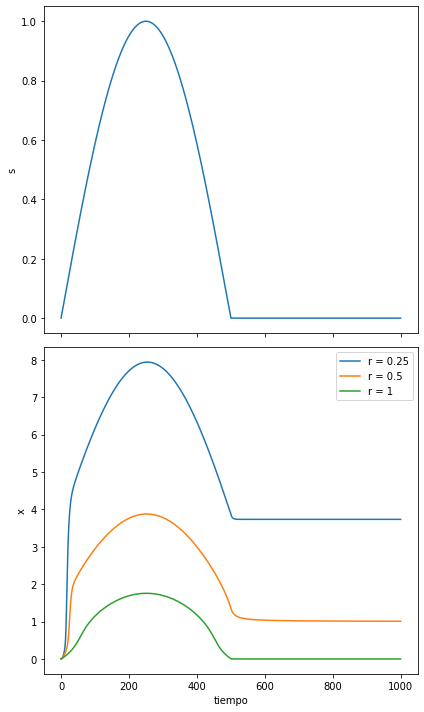

In [ ]:
# Para distintos valores de r posibles, vamos a hacer una integración con esta
# función para s
rs = [0.25, .5, 1]

fig, ax = plt.subplots(2, sharex=True, figsize=(6, 10))
ax[0].plot(t, sfunc(t))
ax[0].set_ylabel('s')

for r in rs:
    # Para cada valor de r damos condición inicial en 0 e integramos
    xi = 0
    x = odeint(f, xi, t, args=(r, ))
    ax[1].plot(t, x, label='r = {}'.format(r))
ax[1].legend(loc='upper right')
ax[1].set_ylabel('x')
ax[1].set_xlabel('tiempo')
fig.tight_layout()

